In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import ttest_ind
import pprint 
import hvplot.pandas
import requests

In [2]:
# Load the CSV file 
mortgage_rates = pd.read_csv("Source Data/Table26-2019-by-Month.csv")

# Display sample data
mortgage_rates

,Year,Month,Contract Interest Rate (%),Initial Fee and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%)
0,1990.0,1.0,9.73,1.86,10.07,15.0,78.1,122.1,66.5,11.8
1,1990.0,2.0,9.78,1.94,10.14,15.0,83.3,128.7,66.5,10.8
2,1990.0,3.0,9.91,2.03,10.30,15.0,72.3,111.1,69.0,12.4
3,1990.0,4.0,10.06,2.00,10.44,15.0,74.9,115.8,68.4,10.7
4,1990.0,5.0,10.06,1.96,10.43,15.0,83.4,129.3,68.0,11.7
...,...,...,...,...,...,...,...,...,...,...
704,2018.0,12.0,4.98,1.17,5.10,30.0,242.8,310.3,80.5,70.0
705,2019.0,1.0,4.78,1.18,4.90,30.0,250.7,317.7,81.2,75.1
706,2019.0,2.0,4.67,1.13,4.77,30.0,241.1,307.2,80.7,71.2
707,2019.0,3.0,4.61,1.06,4.69,30.0,254.8,321.5,81.4,71.5


In [3]:
# Convert 'Float_Column' from float to int
mortgage_rates.dropna(inplace = True)
mortgage_rates['Year'] = mortgage_rates['Year'].astype(int)
mortgage_rates['Month'] = mortgage_rates['Month'].astype(int)

#Read into Dataframe
mortgage_rates_df = pd.DataFrame(mortgage_rates)

#Filter for only the 30 year mortgages
filtered_30_year = mortgage_rates_df.loc[(mortgage_rates_df["Term to Maturity"] == 30)]
filtered_30_year

#Filter for mortgage rates from 2006-2010
filtered_years = filtered_30_year.loc[(mortgage_rates_df["Year"] == 2006.0) | (mortgage_rates_df["Year"] == 2007.0) | (mortgage_rates_df["Year"] == 2008.0) | (mortgage_rates_df["Year"] == 2009.0) | (mortgage_rates_df["Year"] == 2010.0)].reset_index(drop=True)
sorted_columns = filtered_years[["Year", "Month", "Contract Interest Rate (%)" ]] 

sorted_columns.head()                               

,Year,Month,Contract Interest Rate (%)
0,2006,1,6.40
1,2006,2,6.42
2,2006,3,6.47
3,2006,4,6.55
4,2006,5,6.65


In [4]:
#Read Treausry CSV File
vertical_30_year = pd.read_csv("Output_Data/2005-2010, 30 Year Rates, Comparable.csv")
vertical_30_year.head()

,Month,30 Year,Year
0,1,NaN,2006
1,2,4.54,2006
2,3,4.73,2006
3,4,5.06,2006
4,5,5.20,2006


In [5]:
#Merge Mortgage Rate and Treasury Yields Dataframes
merged_df = pd.merge(sorted_columns, vertical_30_year, on=['Year', 'Month'])
merged_df.head()
merged_df.dtypes
#rates = merged_df[["Contract Interest Rate (%)", "30 Year"]]
#dates = merged_df[["Year", "Month"]].round(0)
#dates.head()



Year                            int32
Month                           int32
Contract Interest Rate (%)    float64
30 Year                       float64
dtype: object

In [6]:
#Convert month to a two digit string
merged_df["two_digit_month"] = merged_df["Month"].astype(str).str.zfill(2)
merged_df.head()

,Year,Month,Contract Interest Rate (%),30 Year,two_digit_month
0,2006,1,6.40,NaN,01
1,2006,2,6.42,4.54,02
2,2006,3,6.47,4.73,03
3,2006,4,6.55,5.06,04
4,2006,5,6.65,5.20,05


In [7]:
#Convert year to a string
merged_df["Year"]=merged_df["Year"].astype(str)

#Merge the month and year in a new column
merged_df['Date']= merged_df["two_digit_month"] + ', ' + merged_df["Year"]
merged_df.head()

,Year,Month,Contract Interest Rate (%),30 Year,two_digit_month,Date
0,2006,1,6.40,NaN,01,"01, 2006"
1,2006,2,6.42,4.54,02,"02, 2006"
2,2006,3,6.47,4.73,03,"03, 2006"
3,2006,4,6.55,5.06,04,"04, 2006"
4,2006,5,6.65,5.20,05,"05, 2006"


In [8]:
#rename columns
renamed = merged_df.rename(columns={
                    "Contract Interest Rate (%)": "Average 30 Year Mortgage Rate",
                    "30 Year": "Average 30 Year Treasury Yield Curve Rate"
    })

In [9]:
#Select the date and mortgage interest rate columns 
organized = renamed[['Date', 'Average 30 Year Mortgage Rate']]
organized.head()

,Date,Average 30 Year Mortgage Rate
0,"01, 2006",6.40
1,"02, 2006",6.42
2,"03, 2006",6.47
3,"04, 2006",6.55
4,"05, 2006",6.65


In [10]:
#Export to CSV
formated_30_year = organized.to_csv("Output_Data/2005-2010, 30 Year Mortgage.csv", index=False)

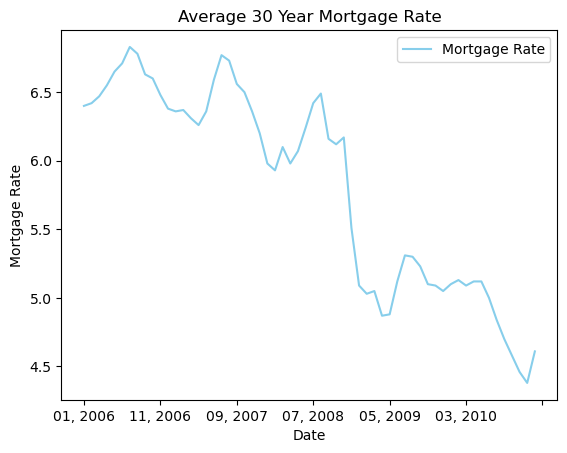

In [11]:
#Plot a figure for Mortgage Rates
organized.plot(x='Date', y='Average 30 Year Mortgage Rate', kind='line', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Mortgage Rate')
plt.title('Average 30 Year Mortgage Rate')
plt.legend({'Mortgage Rate'})

plt.savefig("Output_Data/05-10 Avg 30 Yr Mortgage Rate.png")

plt.show()

In [12]:
#Call dataframe for mortgage rates and treasury yields
#Select only date, mortgage rates, and treasury yield columns
organized2 = renamed[['Date', 'Average 30 Year Mortgage Rate', 'Average 30 Year Treasury Yield Curve Rate']]
organized2.head()

,Date,Average 30 Year Mortgage Rate,Average 30 Year Treasury Yield Curve Rate
0,"01, 2006",6.40,NaN
1,"02, 2006",6.42,4.54
2,"03, 2006",6.47,4.73
3,"04, 2006",6.55,5.06
4,"05, 2006",6.65,5.20


In [13]:
#Export as CSV
formated_30_year = organized2.to_csv("Output_Data/2005-2010, Both Mortgage and Treasury.csv", index=False)

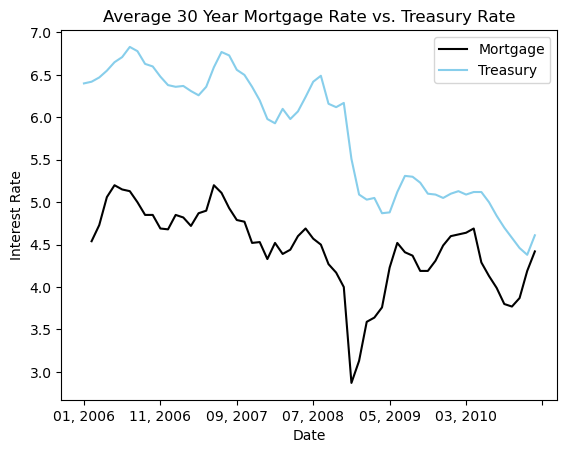

In [14]:
#Plot figure of monthly comparison between mortgage and treasury rates
ax = organized2.plot(x='Date', y=['Average 30 Year Treasury Yield Curve Rate'], kind='line', color='black')
organized2.plot(x='Date', y=["Average 30 Year Mortgage Rate"], kind='line', color='skyblue', ax=ax)
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Average 30 Year Mortgage Rate vs. Treasury Rate')
plt.legend({'Treasury', 'Mortgage'})

plt.savefig("Output_Data/Treasury and Mortgages.png")

plt.show()

In [15]:
#ttest 
dropped = organized2.dropna()
dropped.head()
Treasury = dropped['Average 30 Year Treasury Yield Curve Rate']
Mortgage = dropped['Average 30 Year Mortgage Rate']

ttest_ind(Treasury, Mortgage, equal_var=False )

TtestResult(statistic=-11.611468846496724, pvalue=3.417893260344795e-20, df=99.1509613941911)